## ODOT Crash data analysis

### John Burt

July 2018

Working with ODOT crash data from 2003 - 2015, covering all of Oregon.

In this notebook I visualize the impact of time of day and day of the week on traffic fatalities. The pattern is pretty much as expected: fewer crashes on the weekends, more crashes at rush hour M-F. 

Contact me if you want the Oregon crash data (2003 - 2015) that I used here. 


In [7]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

#%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import pickle
import math


import pickle

# set all font sizes
matplotlib.rcParams.update({'font.size': 18})

# set all line widths
matplotlib.rcParams.update({'lines.linewidth': 2})

# set all symbol sizes
matplotlib.rcParams.update({'lines.markersize': 10})

matplotlib.rcParams.update({'axes.facecolor': 'white'})
matplotlib.rcParams.update({'axes.edgecolor': 'black'})

# specify all data files to load
alldatafilenames = ['SW_Crashes_2003_CDS501.csv',
                    'SW_Crashes_2004_CDS501.csv',
                    'SW_Crashes_2005_CDS501.csv',
                    'SW_Crashes_2006_CDS501.csv',
                    'SW_Crashes_2007_CDS501.csv',
                    'SW_Crashes_2008_CDS501.csv',
                    'SW_Crashes_2009_CDS501.csv',
                    'SW_Crashes_2010_CDS501.csv',
                    'SW_Crashes_2011_CDS501.csv',
                    'SW_Crashes_2012_CDS501.csv',
                    'SW_Crashes_2013_CDS501.csv',
                    'SW_Crashes_2014_CDS501.csv',
                    'SW_Crashes_2015_CDS501.csv',
                    ]

# load the data files into one dataframe
data = []
for filename in alldatafilenames:
    if type(data) == list: # read the first data file
        print('reading '+filename)
        data = pd.read_csv(filename,encoding = "latin1")
    else: # append subsequent data files
        print('reading '+filename)
        data = data.append(pd.read_csv(filename, encoding = "latin1"), ignore_index=True)

print('done')


reading SW_Crashes_2003_CDS501.csv
reading SW_Crashes_2004_CDS501.csv
reading SW_Crashes_2005_CDS501.csv
reading SW_Crashes_2006_CDS501.csv
reading SW_Crashes_2007_CDS501.csv
reading SW_Crashes_2008_CDS501.csv
reading SW_Crashes_2009_CDS501.csv
reading SW_Crashes_2010_CDS501.csv
reading SW_Crashes_2011_CDS501.csv
reading SW_Crashes_2012_CDS501.csv
reading SW_Crashes_2013_CDS501.csv
reading SW_Crashes_2014_CDS501.csv
reading SW_Crashes_2015_CDS501.csv
done


In [8]:
data.head()

,Unnamed: 0,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Month,Crash Day,Crash Year,Week Day Code,Crash Hour,County Code,City Section ID,Urban Area Code,Functional Class Code,NHS Flag,Highway Number,Highway Suffix,Roadway Number,Highway Component,Mileage Type,Connection Number,Linear Reference System (LRS),Latitude Degrees,Latitude Minutes,Latitude Seconds,Longitude Degrees,Longitude Minutes,Longitude Seconds,Special Jurisdiction,Jurisdiction Group,Street Number,Nearest Intersecting Street Number,Intersection Sequence Number,Distance from Intersection,Direction From Intersection,Milepoint,Posted Speed Limit,Road Character,Off Roadway Flag,Intersection Type,Intersection Related Flag,Roundabout Flag,Driveway Related Flag,Number of Lanes,Number of Turning Legs,Median Type,...,Vehicle Ownership Code,Vehicle Special Use Code,Vehicle Type Code,Emergency Use Flag,Number of Trailers,Vehicle Movement Code,Vehicle Travel Direction From,Vehicle Travel Direction To,Vehicle Action Code,Vehicle Cause 1 Code,Vehicle Cause 2 Code,Vehicle Cause 3 Code,Vehicle Event 1 Code,Vehicle Event 2 Code,Vehicle Event 3 Code,Vehicle Exceeded Posted Speed Flag,Vehicle Hit & Run Flag,Safety Equipment Used Quantity,Safety Equipment Un-used Quantity,Safety Equipment Use Unknown Quantity,Vehicle Occupant Count,Vehicle Striking Flag,Participant Type Code,Participant Hit & Run Flag,Public Employee Flag,Sex,Age,Driver License Status,Driver Residence,Injury Severity,Participant Safety Equipment Use Code,Airbag Deployment,Non-Motorist Movement Code,Non-Motorist Travel Direction From,Non-Motorist Travel Direction To,Non-Motorist Location,Participant Action,Participant Error 1 Code,Participant Error 2 Code,Participant Error 3 Code,Participant Cause 1 Code,Participant Cause 2 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code,BAC Test Results Code,Alcohol Use Reported,Drug Use Reported,Participant Striker Flag
0,0,948026,1,NaN,NaN,NaN,NaN,NaN,21,1.0,12.0,2003.0,1.0,19.0,4.0,0.0,0.0,7.0,0.0,,,,,,,,,,,,,,0.0,,01301,,,,0.0,1.5,,5,0.0,,0,0.0,0.0,2.0,,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,948026,2,1796065.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0,,,035,,,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,948026,3,1796065.0,2075139.0,1.0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,43.0,1,1,9.0,9,,,,,,0.0,0.0,,,12.0,00,,,,,,,,0.0
3,3,948027,1,NaN,NaN,NaN,NaN,NaN,12,1.0,2.0,2003.0,5.0,16.0,24.0,184.0,67.0,12.0,0.0,,,,,,,,,,,,,,0.0,,00214,01324,1,50,8.0,,,3,0.0,,0,0.0,0.0,2.0,,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,948027,2,1796253.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,1.0,0.0,,1.0,8.0,4.0,1.0,0.0,,,,,,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# look at fatal crash numbers

# get only fatal accidents
fdata = data[(data['Record Type']==1) & (data['Crash Severity']==4) & (data['Latitude Degrees'] != '  ')]
fdata.shape

(219477, 153)

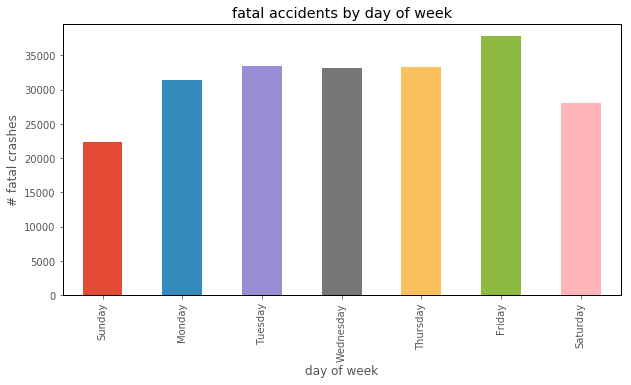

In [11]:
groupcol = 'Week Day Code'

grouped = fdata.groupby(groupcol).size().reset_index(name='counts')
grouped = grouped.sort_values(groupcol)

# create day name column for plot
dayOfWeek={2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Saturday', 1:'Sunday'}
grouped['dayname'] = grouped[groupcol].map(dayOfWeek)

grouped.plot.bar(x='dayname',y='counts',grid=False,figsize=(10,5),legend=False)
plt.ylabel('# fatal crashes')
plt.xlabel('day of week')
plt.title('fatal accidents by day of week');


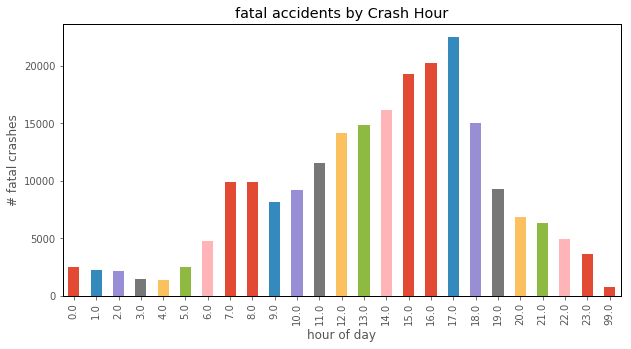

In [12]:
groupcol = 'Crash Hour'

grouped = fdata.groupby(groupcol).size().reset_index(name='counts')
grouped = grouped.sort_values(groupcol)

grouped.plot.bar(x=groupcol,y='counts',grid=False,figsize=(10,5),legend=False)
plt.ylabel('# fatal crashes')
plt.xlabel('hour of day')
plt.title('fatal accidents by '+groupcol);


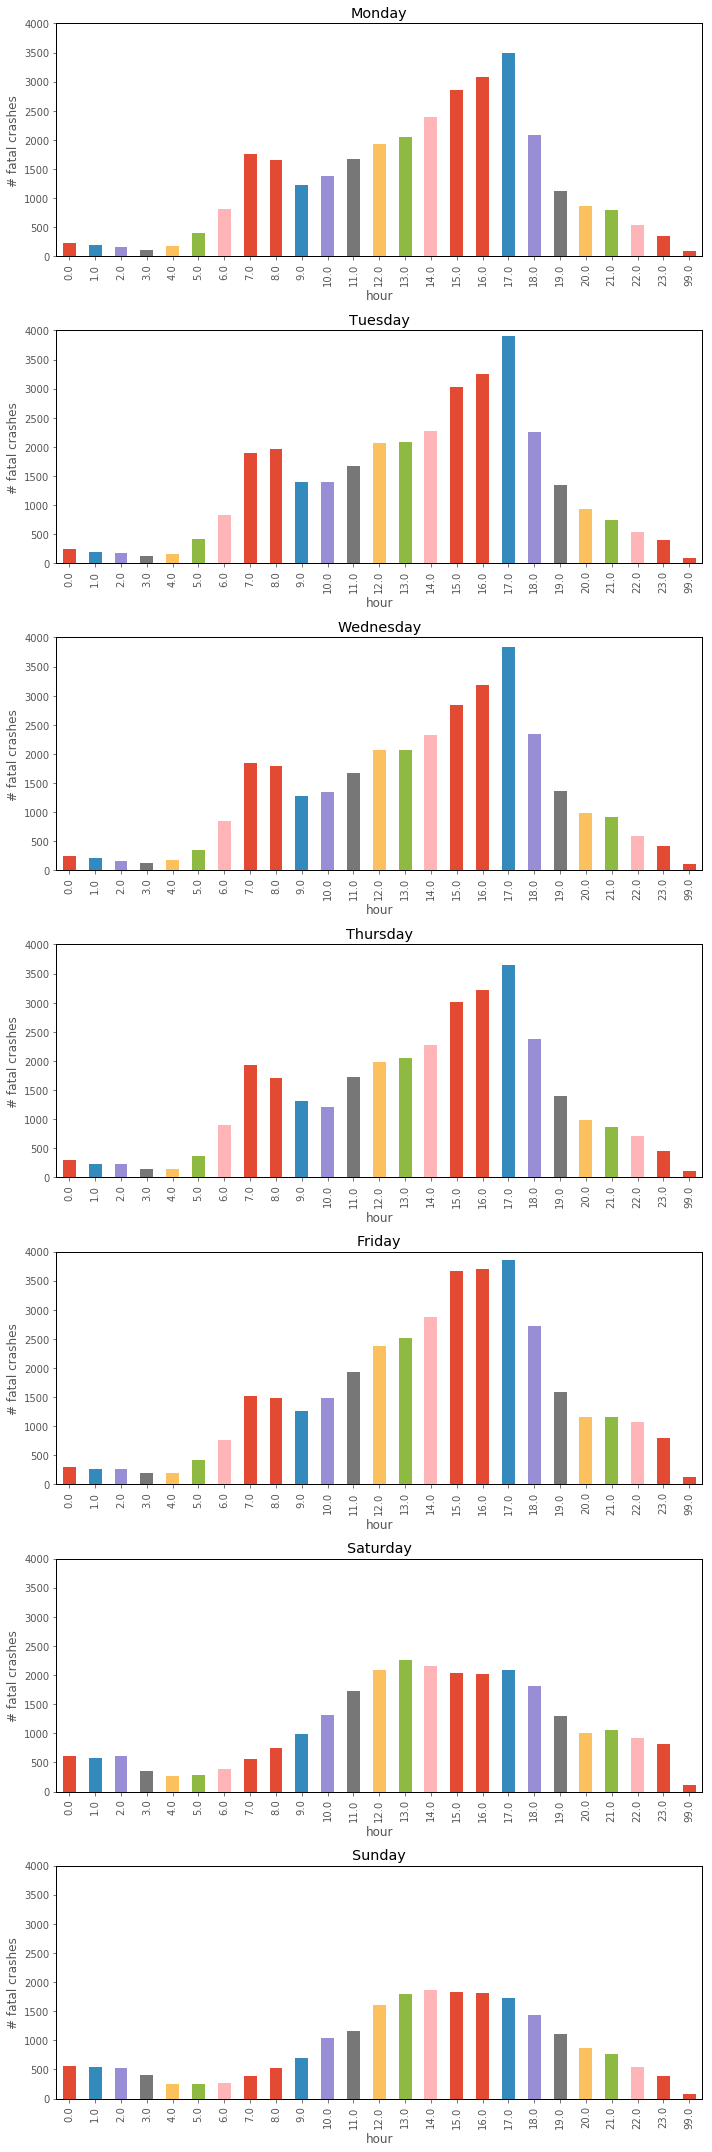

In [27]:
# create day name column for plot
groupcol = 'Crash Hour'
daynames = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daynums = [2,3,4,5,6,7,1]

fig, axes = plt.subplots(figsize=(10,30),nrows=7, ncols=1)

for daynum,dayname,plotnum in zip(daynums, daynames, range(1,8)):
    daydata = fdata[fdata['Week Day Code']==daynum]
    grouped = daydata.groupby(groupcol).size().reset_index(name='counts')
    grouped = grouped.sort_values(groupcol)

    grouped.plot.bar(ax=axes[plotnum-1], x=groupcol,y='counts',grid=False,legend=False)
    plt.tight_layout()
    axes[plotnum-1].set_ylim([0,4000])
    axes[plotnum-1].set_ylabel('# fatal crashes')
    axes[plotnum-1].set_xlabel('hour')
    axes[plotnum-1].set_title(dayname);
